<a href="https://colab.research.google.com/github/shubhamrai1318/Evaluating_Regression_ModelUsing_RSquared_Adjusted_R_Squared/blob/main/Evaluating_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluating Regression ModelUsing RSquared & Adjusted R Squared**

### **Import Libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### **Load Dataset from Local Directory**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
# Loading dataset
dataset = pd.read_csv('dataset.csv')

### **Summarizing Dataset**

In [5]:
dataset.head()

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [6]:
dataset.tail()

,area,price
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125
1459,9937,147500


In [7]:
dataset.shape

(1460, 2)

In [9]:
dataset.describe()

,area,price
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    1460 non-null   int64
 1   price   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [13]:
dataset.isnull().count()

area     1460
price    1460
dtype: int64

### **Visualize Dataset**

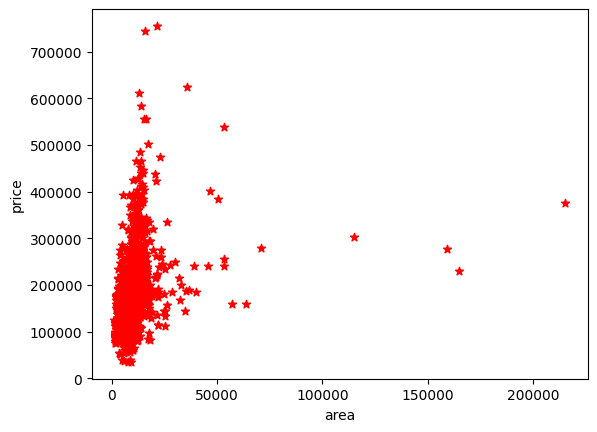

In [14]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(dataset.area,dataset.price,color='red',marker='*')

### **Segregate Dataset into Input X & Output Y**

In [15]:
X = dataset.drop('price',axis='columns')
X


,area
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [16]:
Y = dataset.price
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: price, Length: 1460, dtype: int64

### **Splitting Dataset for Testing our Model**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

### **Training Dataset using Linear Regression**

In [18]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### **Visualizing Linear Regression Result**

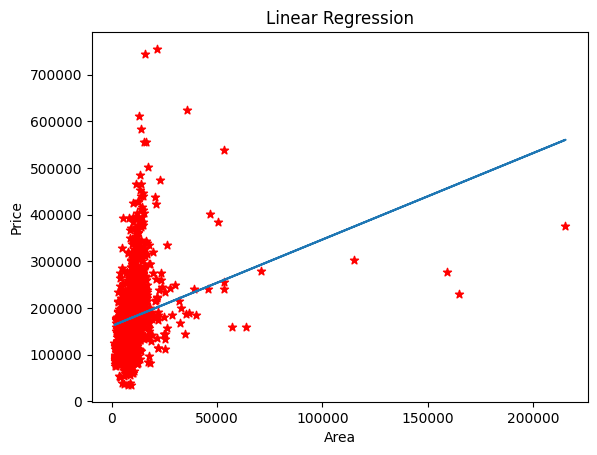

In [19]:
plt.scatter(X,Y, color="red",marker='*')
plt.plot(X, model.predict(X))
plt.title("Linear Regression")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### 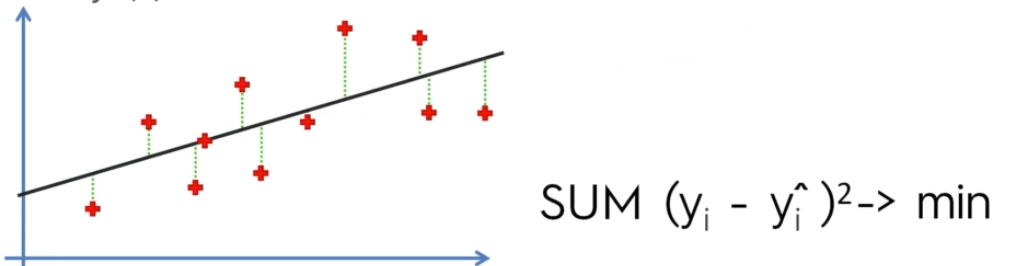
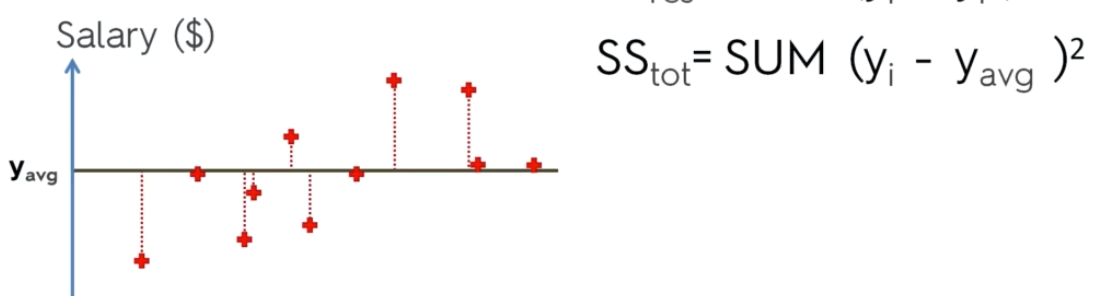
R Squared = 1- (SSR/SST)

where,
SSR = Sum of Squared Residuals

SST = Sum of Squared Total

Adjusted R Squared= 1 — [(1 — R Squared) * ((n-1) / (n-p-1))]


### **R2 Scored**

In [20]:
rsquared = model.score(x_test, y_test)
print(rsquared)

0.08557014199167645


### **Adjusted R2 of the Model**

In [21]:
n=len(dataset) #Length of Total dataset
p=len(dataset.columns)-1 #length of Features
adjr= 1-(1-rsquared)*(n-1)/(n-p-1)
print(adjr)

0.08494296101910559


### **Prediction**

In [22]:
x=6500
LandAreainSqFt=[[x]]
PredictedmodelResult = model.predict(LandAreainSqFt)
print(PredictedmodelResult)

[173227.94685863]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
